# Section 2.1.5: Bias-Variance Trade-Off
## by Telmo Cunha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(55)

In [2]:
# h(x)=sin(2pix) for x\in[0,1]
def g(x):
    return np.sin(2*np.pi*x)

In [3]:
def gaussian_basis_function(x,mean,var):
    return np.exp(-0.5*np.square(x - mean)/var)

### Creating the Ensemble of datasets

In [4]:
ensemble_size=100
datapoints=25
number_of_parameters=25

# Each column of D_I is a dataset of 25 datapoints (by default) sampled uniformly with x in (0,1) and labeled by h=sin(2pix)
# We have 100 columns (by default)

x_I=np.zeros((datapoints,ensemble_size))
t_I=np.zeros((datapoints,ensemble_size))

for i in range(ensemble_size): 
    x_I[:,i]=np.random.uniform(low=0.0, high=1.0, size=datapoints)
    epsilon=np.random.normal(loc=0.0, scale=0.3, size=datapoints)
    t_I[:,i]=g(x_I[:,i])+epsilon

In [5]:
# the means of the gaussian basis functions (24 basis functions)
gaussian_mean=np.linspace(0,1,num=number_of_parameters-1)
# the variance is set to the same value 0.01 (by default)
gaussian_var=0.01

### Generating the $\Phi$ matrices for the ensemble

In [6]:
phi_matrix_ensemble=np.zeros((datapoints,number_of_parameters,ensemble_size))

for i in range(ensemble_size):
    for k in range(number_of_parameters):
        if (k==0):
            phi_matrix_ensemble[:,k,i]=1
        else:
            phi_matrix_ensemble[:,k,i]=gaussian_basis_function(x_I[:,i],gaussian_mean[k-1],gaussian_var)

### Computing regularized least squares solution

In [7]:
def regularized_least_squares(reg_lambda=0.01):
    
    print("lambda:",np.round(reg_lambda,3))
    
    W=np.zeros((number_of_parameters,ensemble_size))

    id_matrix=np.eye(number_of_parameters)
    
    for k in range(ensemble_size):    
        aux1=reg_lambda*id_matrix+np.matmul(phi_matrix_ensemble[:,:,k].T,phi_matrix_ensemble[:,:,k])
        aux2=np.linalg.inv(aux1)
        W[:,k]=np.matmul(np.matmul(aux2,phi_matrix_ensemble[:,:,k].T),t_I[:,k])
        
    return W

In [8]:
# parameter matrix solution for the ensemble
lambda_reg=0.05
W=regularized_least_squares(lambda_reg)

lambda: 0.05


### Test error

In [9]:
def error_computation(lambda_reg,W,test_set):
    
    error=0
    
    W=np.mean(W,axis=1)
    
    for i in range(num_predictions):
    
        error+=np.square(y_predictor_avg[i]-test_set[i])
        
    return (0.5*error+0.5*lambda_reg*np.square(np.linalg.norm(W)))/num_predictions

### Computing regularized least squares solution

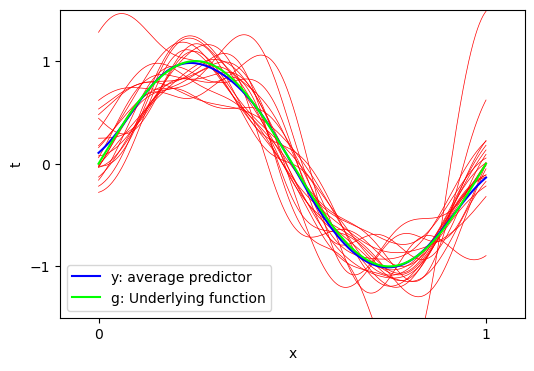

In [10]:
num_predictions=1000
x_predict = np.linspace(0, 1, num_predictions)

fig, ax = plt.subplots(figsize=(6, 4))

ax.set(xlim=(-0.1, 1.1), xticks=np.arange(0, 1.1),
       ylim=(-1.5, 1.5), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x')
ax.set_ylabel('t')

y2 = g(x_predict)

# Predicting matrix for the ensemble and the average over the ensemble
y_predictor=np.zeros((num_predictions,ensemble_size))
y_predictor_avg=np.zeros(num_predictions)
 
for i in range(ensemble_size):
    for k in range(num_predictions):
        for l in range(number_of_parameters):
            if l==0:  
                y_predictor[k,i]+=W[l,i]
            else:
                y_predictor[k,i]+=W[l,i]*gaussian_basis_function(x_predict[k],gaussian_mean[l-1],gaussian_var)
    
    if(i%5==0):
        ax.plot(x_predict, y_predictor[:,i], linewidth=0.5, color="red")
    

y_predictor_avg=np.mean(y_predictor,axis=1)
ax.plot(x_predict, y_predictor_avg, linewidth=1.5, color="blue", label="y: average predictor")

ax.plot(x_predict, y2, linewidth=1.5, color="lime", label="g: Underlying function")
plt.legend(loc='best')
plt.show()

### Test set Error

In [11]:
epsilon=np.random.normal(loc=0.0, scale=0.3, size=num_predictions)
test_set=g(x_predict)+epsilon

print("Test Error:", error_computation(lambda_reg,W,test_set))

Test Error: 0.042719405641926105


### Bias and variance computation

In [12]:
def bias_computation():
    
    bias_squared=0
    
    # approximating the integral
    
    for i in range(num_predictions):
        bias_squared+=np.square(y_predictor_avg[i]-g(x_predict[i]))
        
    return bias_squared/num_predictions

In [13]:
def var_computation():
    
    var=0
    
    for i in range(num_predictions):
        for k in range(ensemble_size):
            var+=np.square(y_predictor[i,k]-y_predictor_avg[i])
        
    return var/(num_predictions*ensemble_size)

In [14]:
lambda_vector=np.linspace(0.08,4.5,50)

# lambda, bias, var, test_error matrix
data=np.zeros((len(lambda_vector),4))

epsilon=np.random.normal(loc=0.0, scale=0.3, size=num_predictions)
test_set=g(x_predict)+epsilon

for z in range(len(lambda_vector)):
    
    W=regularized_least_squares(lambda_vector[z])
    y_predictor=np.zeros((num_predictions,ensemble_size))
    y_predictor_avg=np.zeros(num_predictions)
 
    for i in range(ensemble_size):
        for k in range(num_predictions):
            for l in range(number_of_parameters):
                if l==0:  
                    y_predictor[k,i]+=W[l,i]
                else:
                    y_predictor[k,i]+=W[l,i]*gaussian_basis_function(x_predict[k],gaussian_mean[l-1],gaussian_var)
    
    y_predictor_avg=np.mean(y_predictor,axis=1)
    
    data[z]=[lambda_vector[z],bias_computation(),var_computation(),error_computation(lambda_vector[z],W,test_set)]

lambda: 0.08
lambda: 0.17


KeyboardInterrupt: 

In [ ]:
index=np.argmin(data[:,3])
print("Min. test error:",data[index,3]," for lambda=",data[index,0])

In [ ]:
fig, ax = plt.subplots()

ax.plot(np.log(data[:,0]), data[:,1], linewidth=1.0, color="blue", label="Bias$^2$")
ax.plot(np.log(data[:,0]), data[:,2], linewidth=1.0, color="red", label="Variance")
ax.plot(np.log(data[:,0]), data[:,3], linewidth=1.0, color="green", label="Test Error")
ax.plot(np.log(data[:,0]), data[:,1]+data[:,2], linewidth=1.0, color="purple", label="Bias$^2$+Variance")

ax.set_xlabel('log $\lambda$')

ax.set(xlim=(-2.7, 1.6), xticks=np.arange(-2.7, 1.6,0.5),
       ylim=(0, 0.06), yticks=np.arange(0, 0.06,0.01))

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()